In [1]:
#Importing of dependencies, maybe don't need all?
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit as poly
import statsmodels.api as sm
import scipy as stats
import pandas as pd
from sklearn import linear_model
from pprint import pprint

In [2]:
#read our Fangraphs data from the following links:
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=10&type=1&season=2018&month=0&season1=2002&ind=1&team=0&rost=0&age=0&filter=&players=0
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=10&type=5&season=2018&month=0&season1=2002&ind=1&team=0&rost=0&age=0&filter=&players=0
pdstats = pd.read_csv("Resources/Leaderboard.csv")
restats = pd.read_csv("Resources/Leaderboard2.csv")
# Combine individual player seasons
total = pd.merge(pdstats, restats, on=['Season', 'playerid'])
# Remove data that is not likely to be relevant
total = total.drop(['Team_x', 'LOB%', 'ERA-', 'FIP-', 'xFIP-', 'E-F', 'AVG', 'WHIP', 'K/BB', 'K/9', 'BB/9', 'HR/9', 'SIERA', 'Name_y', 'Team_y'], axis=1)
total.head()

,Season,Name_x,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,playerid,K%,BB%,K-BB%,BABIP,ERA,FIP,xFIP
0,2017,Sean Doolittle,46.3 %,75.8 %,59.9 %,68.9 %,78.2 %,74.3 %,46.2 %,70.6 %,15.4 %,1581,31.5 %,5.1 %,26.4 %,0.242,2.81,2.59,3.47
1,2012,Koji Uehara,46.1 %,70.3 %,57.7 %,65.9 %,68.2 %,67.2 %,48.0 %,66.9 %,18.9 %,9227,33.1 %,2.3 %,30.8 %,0.200,1.75,2.40,2.67
2,2007,Kevin Hart,44.3 %,63.4 %,52.4 %,39.5 %,84.4 %,62.5 %,42.3 %,61.9 %,19.6 %,8079,31.0 %,9.5 %,21.4 %,0.280,0.82,1.97,3.11
3,2017,Josh Lindblom,43.6 %,75.0 %,56.5 %,70.8 %,93.0 %,82.9 %,40.9 %,66.7 %,9.7 %,7882,19.6 %,5.9 %,13.7 %,0.474,7.84,2.09,4.68
4,2013,Brandon Gomes,42.9 %,61.5 %,50.9 %,56.8 %,71.6 %,64.5 %,43.1 %,69.9 %,17.4 %,2267,34.9 %,8.4 %,26.5 %,0.326,6.52,3.82,3.18


In [3]:
# Remove all of the % signs from the Data
total['O-Swing%'] = total['O-Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['Z-Swing%'] = total['Z-Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['Swing%'] = total['Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['O-Contact%'] = total['O-Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['Zone%'] = total['Zone%'].str.replace(r' %', r'').astype('float') /100.0
total['Z-Contact%'] = total['Z-Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['Contact%'] = total['Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['F-Strike%'] = total['F-Strike%'].str.replace(r' %', r'').astype('float') /100.0
total['SwStr%'] = total['SwStr%'].str.replace(r' %', r'').astype('float') /100.0
total['K%'] = total['K%'].str.replace(r' %', r'').astype('float') /100.0
total['BB%'] = total['BB%'].str.replace(r' %', r'').astype('float') /100.0
total['K-BB%'] = total['K-BB%'].str.replace(r' %', r'').astype('float') /100.0

In [4]:
# Add variables for calculatiopns based on Plate discipline data
# Out of zone %
total['O-Zone%'] = 1 - total['Zone%']
# Zone swing percentage
total['ZSwing'] = total['Zone%'] * total['Z-Swing%']
# Zone Looking %
total['ZLook'] = total['Zone%'] * (1- total['Z-Swing%'])
# Out of Zone swing %
total['OSwing'] = total['O-Zone%'] * total['O-Swing%']
# Out of zone looking percentage
total['OLook'] = total['O-Zone%'] * (1- total['O-Swing%'])
# Zone contact percentage
total['ZCon'] = total['ZSwing'] * total['Z-Contact%']
# Zone Whiff percentage
total['ZWif'] = total['ZSwing'] * (1 -total['Z-Contact%'])
# Out of zone contact percentage
total['OCon'] = total['OSwing'] * total['O-Contact%']
# Out of zone Whiff percentage
total['OWif'] = total['OSwing'] * (1 -total['O-Contact%'])
total.to_csv("Resources/data.csv")

In [5]:
t2002 = total[total.Season == 2002]
t2003 = total[total.Season == 2003]
t2004 = total[total.Season == 2004]
t2005 = total[total.Season == 2005]
t2006 = total[total.Season == 2006]
t2007 = total[total.Season == 2007]
t2008 = total[total.Season == 2008]
t2009 = total[total.Season == 2009]
t2010 = total[total.Season == 2010]
t2011 = total[total.Season == 2011]
t2012 = total[total.Season == 2012]
t2013 = total[total.Season == 2013]
t2014 = total[total.Season == 2014]
t2015 = total[total.Season == 2015]
t2016 = total[total.Season == 2016]
t2017 = total[total.Season == 2017]
t2018 = total[total.Season == 2018]

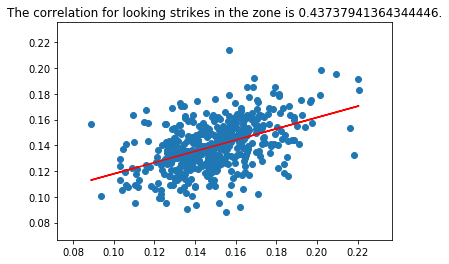

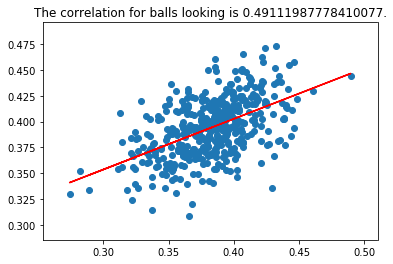

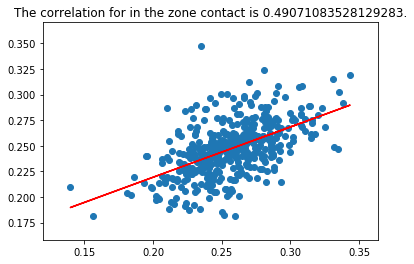

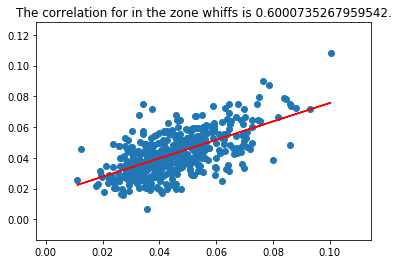

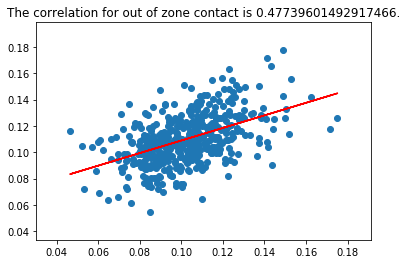

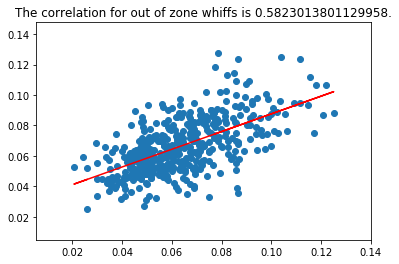

In [6]:
graph = pd.merge(t2017, t2018, on=['playerid'])
plt.figure(0)
plt.scatter(graph.ZLook_x, graph.ZLook_y)
b, m = poly(graph.ZLook_x, graph.ZLook_y, 1)
plt.plot(graph.ZLook_x, b + m * graph.ZLook_x, '-', c='r')
plt.title(f'The correlation for looking strikes in the zone is {m}.')


plt.figure(1)
plt.scatter(graph.OLook_x, graph.OLook_y)
b, m = poly(graph.OLook_x, graph.OLook_y, 1)
plt.plot(graph.OLook_x, b + m * graph.OLook_x, '-', c='r')
plt.title(f'The correlation for balls looking is {m}.')


plt.figure(2)
plt.scatter(graph.ZCon_x, graph.ZCon_y)
b, m = poly(graph.ZCon_x, graph.ZCon_y, 1)
plt.plot(graph.ZCon_x, b + m * graph.ZCon_x, '-', c='r')
plt.title(f'The correlation for in the zone contact is {m}.')


plt.figure(3)
plt.scatter(graph.ZWif_x, graph.ZWif_y)
b, m = poly(graph.ZWif_x, graph.ZWif_y, 1)
plt.plot(graph.ZWif_x, b + m * graph.ZWif_x, '-', c='r')
plt.title(f'The correlation for in the zone whiffs is {m}.')

plt.figure(4)
plt.scatter(graph.OCon_x, graph.OCon_y)
b, m = poly(graph.OCon_x, graph.OCon_y, 1)
plt.plot(graph.OCon_x, b + m * graph.OCon_x, '-', c='r')
plt.title(f'The correlation for out of zone contact is {m}.')

plt.figure(5)
plt.scatter(graph.OWif_x, graph.OWif_y)
b, m = poly(graph.OWif_x, graph.OWif_y, 1)
plt.plot(graph.OWif_x, b + m * graph.OWif_x, '-', c='r')
plt.title(f'The correlation for out of zone whiffs is {m}.')

plt.show()

In [7]:
tester = total[total.Season > 2012]
tester = tester[tester.Season < 2017]
test = total[total.Season > 2016]

In [30]:
xx =tester[['ZLook', 'OLook', 'ZCon', 'ZWif', 'OCon', 'OWif', 'F-Strike%']] 
yy = tester['K-BB%']

xxx = test[['ZLook', 'OLook', 'ZCon', 'ZWif', 'OCon', 'OWif', 'F-Strike%']] 
yyy = test['K-BB%']

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(xx, yy)
predictions = lm.predict(xxx)
predict = lm.predict(xx)
test['xK%'] = predictions

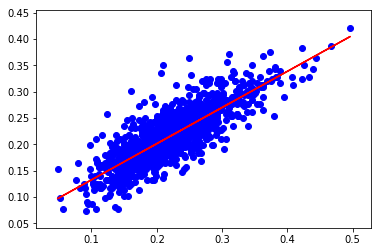

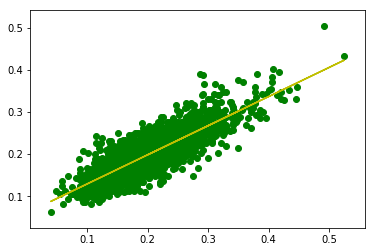

In [9]:
plt.figure(0)
#plt.scatter(xxx, yyy, c='r')

plt.scatter(yyy, predictions, c='b')
b, m = poly(yyy, predictions, 1)
plt.plot(yyy, b + m * yyy, '-', c='r')

plt.figure(1)
plt.scatter(yy, predict, c='g')
b, m = poly(yy, predict, 1)
plt.plot(yy, b + m * yy, '-', c='y')

In [10]:
pds = pd.read_csv("Resources/2019.csv")
res = pd.read_csv("Resources/20192.csv")
# Combine individual player seasons
tota = pd.merge(pds, res, on=['playerid'])
# Remove data that is not likely to be relevant
tota = tota.drop(['Team_x', 'LOB%', 'ERA-', 'FIP-', 'xFIP-', 'E-F', 'AVG', 'WHIP', 'K/BB', 'K/9', 'BB/9', 'HR/9', 'SIERA', 'Name_y', 'Team_y'], axis=1)
# Remove all of the % signs from the Data
tota['O-Swing%'] = tota['O-Swing%'].str.replace(r' %', r'').astype('float') /100.0
tota['Z-Swing%'] = tota['Z-Swing%'].str.replace(r' %', r'').astype('float') /100.0
tota['Swing%'] = tota['Swing%'].str.replace(r' %', r'').astype('float') /100.0
tota['O-Contact%'] = tota['O-Contact%'].str.replace(r' %', r'').astype('float') /100.0
tota['Zone%'] = tota['Zone%'].str.replace(r' %', r'').astype('float') /100.0
tota['Z-Contact%'] = tota['Z-Contact%'].str.replace(r' %', r'').astype('float') /100.0
tota['Contact%'] = tota['Contact%'].str.replace(r' %', r'').astype('float') /100.0
tota['F-Strike%'] = tota['F-Strike%'].str.replace(r' %', r'').astype('float') /100.0
tota['SwStr%'] = tota['SwStr%'].str.replace(r' %', r'').astype('float') /100.0
tota['K%'] = tota['K%'].str.replace(r' %', r'').astype('float') /100.0
tota['BB%'] = tota['BB%'].str.replace(r' %', r'').astype('float') /100.0
tota['K-BB%'] = tota['K-BB%'].str.replace(r' %', r'').astype('float') /100.0
tota['O-Zone%'] = 1 - total['Zone%']
# Zone swing percentage
tota['ZSwing'] = tota['Zone%'] * tota['Z-Swing%']
# Zone Looking %
tota['ZLook'] = tota['Zone%'] * (1- tota['Z-Swing%'])
# Out of Zone swing %
tota['OSwing'] = tota['O-Zone%'] * tota['O-Swing%']
# Out of zone looking percentage
tota['OLook'] = tota['O-Zone%'] * (1- tota['O-Swing%'])
# Zone contact percentage
tota['ZCon'] = tota['ZSwing'] * tota['Z-Contact%']
# Zone Whiff percentage
tota['ZWif'] = tota['ZSwing'] * (1 -tota['Z-Contact%'])
# Out of zone contact percentage
tota['OCon'] = tota['OSwing'] * tota['O-Contact%']
# Out of zone Whiff percentage
tota['OWif'] = tota['OSwing'] * (1 -tota['O-Contact%'])

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
mdl = RandomForestRegressor()
mdl.fit(xx, yy)
y_hat = mdl.predict(xxx)

C:\Users\alana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


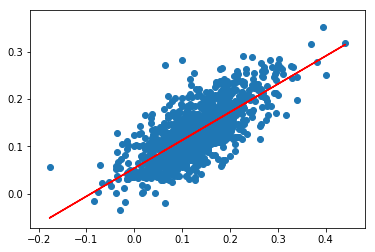

In [32]:
plt.scatter(yyy, y_hat)
b, m = poly(yyy, y_hat, 1)
plt.plot(yyy, b + m * yyy, '-', c='r')

In [15]:
mdl.decision_path(xxx)

(<1225x28106 sparse matrix of type '<class 'numpy.int64'>'
 	with 174222 stored elements in Compressed Sparse Row format>,
 array([    0,  2813,  5638,  8439, 11204, 14017, 16830, 19647, 22442,
        25279, 28106], dtype=int32))

In [33]:
xxxx =tota[['ZLook', 'OLook', 'ZCon', 'ZWif', 'OCon', 'OWif', 'F-Strike%']] 
yyyy = tota['K-BB%']

In [47]:
lm = linear_model.LinearRegression()
model = lm.fit(xx, yy)

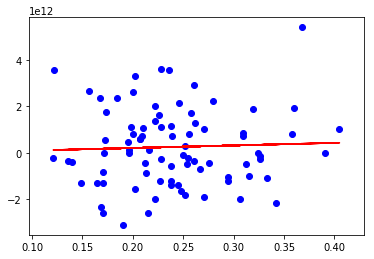

In [17]:
predicts = model.predict(xxxx)
score = model.score(xxxx, yyyy)
plt.scatter(yyyy, predicts, c='b')
b, m = poly(yyyy, predicts, 1)
plt.plot(yyyy, b + m * yyyy, '-', c='r')

In [20]:
[(x[0], x[1]) for x in zip(mdl.feature_importances_, xxxx.columns)]

[(0.11230564238839294, 'ZLook'),
 (0.037334672472883454, 'OLook'),
 (0.05466863634766765, 'ZCon'),
 (0.362407173141274, 'ZWif'),
 (0.04841467665513127, 'OCon'),
 (0.34008509891592487, 'OWif'),
 (0.04478410007872573, 'F-Strike%')]

In [34]:
mdl = RandomForestRegressor()
mdl.fit(xxx, yyy)
y_hat = mdl.predict(xxxx)

C:\Users\alana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
mdl.score(xxxx, yyyy)

0.21324949262911685

In [36]:
tota['xK-BB'] = y_hat
tota.to_csv("Resources/data2019.csv")

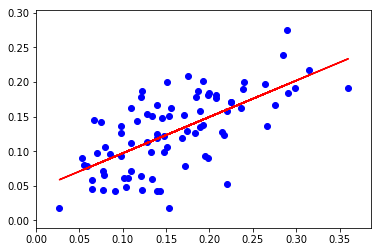

In [37]:
plt.scatter(yyyy, y_hat, c='b')
b, m = poly(yyyy, y_hat, 1)
plt.plot(yyyy, b + m * yyyy, '-', c='r')